<img src= 'http://www.bigbang-datascience.com/wp-content/uploads/2017/09/cropped-Logo-01.jpg' width=500/>

## Project Guide  
------------  
- [Project Overview](#project-overview)  
- [Part 1: Reading Data - Exploratory Data Analysis with Pandas](#I)
- [Part 2: Visual data analysis in Python](#II)
- [Part 3: Data Pre-processing &  Preparation](#III)
- [Part 4: Predictive Analytics](#IV)
- [Part 5: Optimization (Hyper Parameter Tuning)](#V)

<details>
<summary>
Roadmap for Building Machine Learning Models
</summary>
<p>


    1. Prepare Problem  
    a) Define The Business Objective  
    b) Select the datasets  
    c) Load dataset  
    d) Load libraries  


**Data Pre-processing**  
This is the first step in building a machine learning model. Data pre-processing refers to the transformation of data
before feeding it into the model. It deals with the techniques that are used to convert unusable raw data into clean 
reliable data.  
  
Since data collection is often not performed in a controlled manner, raw data often contains outliers 
(for example, age = 120), nonsensical data combinations (for example, model: bicycle, type: 4-wheeler), missing values, 
scale problems, and so on. Because of this, raw data cannot be fed into a machine learning model because it might 
compromise the quality of the results. As such, this is the most important step in the process of data science.  
  

    2. Summarize Data  
    a) Descriptive statistics  
    b) Data visualizations  

    3. Prepare Data  
    a) Data Cleaning  
    b) Feature Selection  
    c) Data Transformation  

**Model Learning**  
After pre-processing the data and splitting it into train/test sets (more on this later), we move on to modeling. Models 
are nothing but sets of well-defined methods called algorithms that use pre-processed data to learn patterns, which can 
later be used to make predictions. There are different types of learning algorithms, including supervised, semi-supervised, 
unsupervised, and reinforcement learning. These will be discussed later.
  
    4. Modeling Strategy  
    a) Select Suitable Algorithms  
    b) Select Training/Testing Approaches  
    c) Train   
  
  
**Model Evaluation**  
In this stage, the models are evaluated with the help of specific performance metrics. With these metrics, we can go on to 
tune the hyperparameters of a model in order to improve it. This process is called hyperparameter optimization. We will 
repeat this step until we are satisfied with the performance.  
  
    4. Evaluate Algorithms  
    a) Split-out validation dataset  
    b) Test options and evaluation metric  
    c) Spot Check Algorithms  
    d) Compare Algorithms  
  
**Prediction**  
Once we are happy with the results from the evaluation step, we will then move on to predictions. Predictions are made 
by the trained model when it is exposed to a new dataset. In a business setting, these predictions can be shared with 
decision makers to make effective business choices.  
  
    5. Improve Accuracy  
    a) Algorithm Tuning  
    b) Ensembles  

**Model Deployment**  
The whole process of machine learning does not just stop with model building and prediction. It also involves making use 
of the model to build an application with the new data. Depending on the business requirements, the deployment may be a 
report, or it may be some repetitive data science steps that are to be executed. After deployment, a model needs proper 
management and maintenance at regular intervals to keep it up and running.  

    6. Finalize Model  
    a) Predictions on validation dataset  
    b) Create standalone model on entire training dataset  
    c) Save model for later use  


</p>
</details>

<a id="I"></a>

# I.  Reading Data - Exploratory Data Analysis with Pandas

### Article outline
1. Demonstration of main Pandas methods
2. First attempt on predicting Auto Insurance Fraud
3. Useful resources

### 1. Demonstration of main Pandas methods 

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

In [139]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')


We’ll demonstrate the main methods in action by analyzing a [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) on the churn rate of telecom operator clients. Let’s read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:


In [140]:
# Disply all Columns
pd.options.display.max_columns=70

### 1.2 Imbalancing Data  SMOTE algorithm (Synthetic Minority Oversampling Technique)

At a high level, SMOTE creates synthetic observations of the minority class (Churned client) by:
  
1.Finding the k-nearest-neighbors for minority class observations (finding similar observations)  
2.Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

In [141]:
autinsurance = pd.read_csv('insurance_claimsV4.csv')
autinsurance.head()

,Unnamed: 0,incident_severity_Total Loss,insured_hobbies_cross-fit,insured_hobbies_chess,incident_severity_Minor Damage,auto_model_X6,auto_make_Volkswagen,insured_occupation_craft-repair,insured_relationship_wife,insured_hobbies_hiking,auto_model_95,auto_model_Neon,insured_relationship_own-child,auto_make_Honda,vehicle_claim,insured_education_level_College,insured_hobbies_reading,insured_relationship_not-in-family,insured_occupation_tech-support,insured_occupation_armed-forces,auto_model_A5,insured_hobbies_camping,auto_model_Malibu,insured_education_level_Masters,incident_state_WV,auto_model_Civic,insured_hobbies_skydiving,insured_occupation_handlers-cleaners,incident_state_VA,insured_relationship_other-relative,insured_hobbies_video-games,collision_type_Rear Collision,collision_type_Side Collision,insured_hobbies_yachting,fraud_reported
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,52080,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,3510,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,2,0,0,0,1,0,0,0,0,0,0,0,1,0,23100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,50720,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,0,0,0,1,0,0,0,0,0,0,0,0,0,4550,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [142]:
autinsurance = autinsurance.drop('Unnamed: 0', axis = 1)

In [143]:
autinsurance['fraud_reported'].value_counts(normalize=True)

0    0.753
1    0.247
Name: fraud_reported, dtype: float64

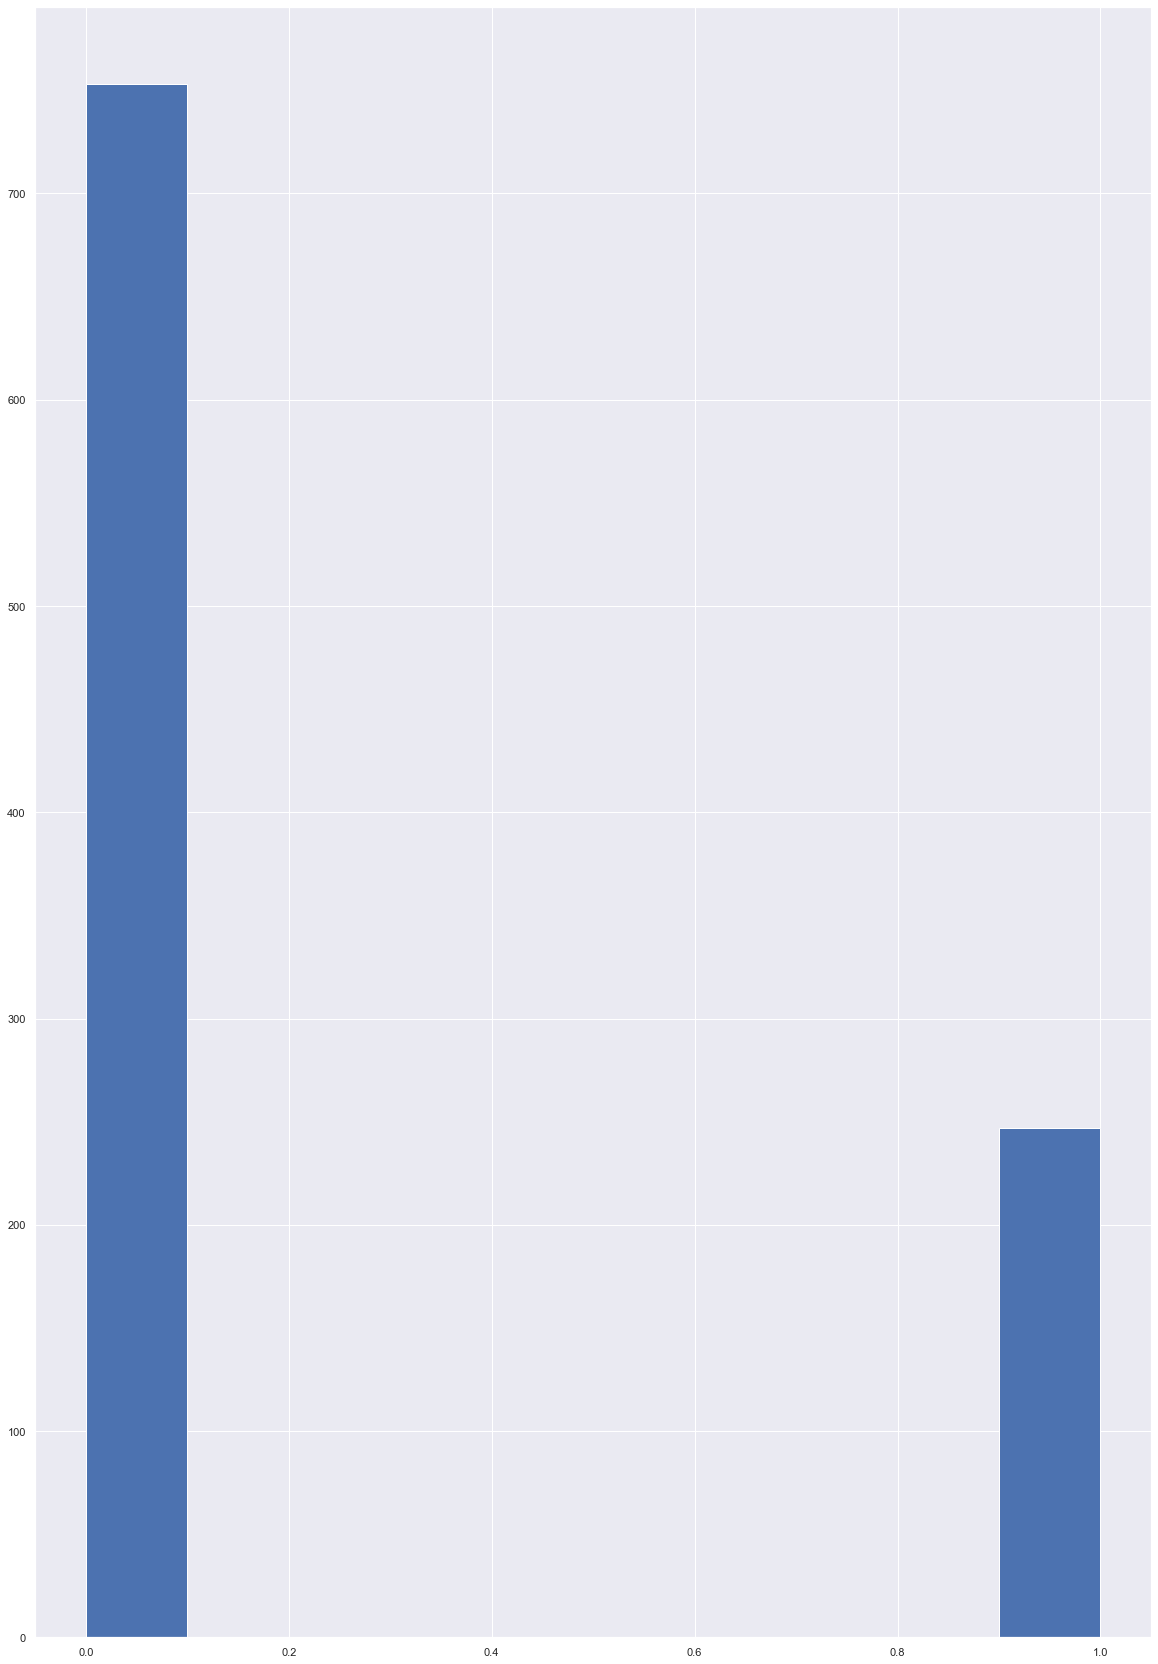

In [144]:
autinsurance['fraud_reported'].hist()

In [145]:
autinsurance.shape

(1000, 34)

In [146]:
autinsurance.columns

Index(['incident_severity_Total Loss', 'insured_hobbies_cross-fit',
       'insured_hobbies_chess', 'incident_severity_Minor Damage',
       'auto_model_X6', 'auto_make_Volkswagen',
       'insured_occupation_craft-repair', 'insured_relationship_wife',
       'insured_hobbies_hiking', 'auto_model_95', 'auto_model_Neon',
       'insured_relationship_own-child', 'auto_make_Honda', 'vehicle_claim',
       'insured_education_level_College', 'insured_hobbies_reading',
       'insured_relationship_not-in-family', 'insured_occupation_tech-support',
       'insured_occupation_armed-forces', 'auto_model_A5',
       'insured_hobbies_camping', 'auto_model_Malibu',
       'insured_education_level_Masters', 'incident_state_WV',
       'auto_model_Civic', 'insured_hobbies_skydiving',
       'insured_occupation_handlers-cleaners', 'incident_state_VA',
       'insured_relationship_other-relative', 'insured_hobbies_video-games',
       'collision_type_Rear Collision', 'collision_type_Side Collision',
 

In [148]:
 X = autinsurance.drop('fraud_reported', axis = 1)
 y = autinsurance.fraud_reported

### 1.3 Data split & Scaling Data Preprocessing

In [150]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(X,y,
                                               test_size = .2,
                                               random_state= 45)


In [75]:
training_features[:1]

,incident_severity_Total Loss,insured_hobbies_cross-fit,insured_hobbies_chess,incident_severity_Minor Damage,auto_model_X6,auto_make_Volkswagen,insured_occupation_craft-repair,insured_relationship_wife,insured_hobbies_hiking,auto_model_95,auto_model_Neon,insured_relationship_own-child,auto_make_Honda,vehicle_claim,insured_education_level_College,insured_hobbies_reading,insured_relationship_not-in-family,insured_occupation_tech-support,insured_occupation_armed-forces,auto_model_A5,insured_hobbies_camping,auto_model_Malibu,insured_education_level_Masters,incident_state_WV,auto_model_Civic,insured_hobbies_skydiving,insured_occupation_handlers-cleaners,incident_state_VA,insured_relationship_other-relative,insured_hobbies_video-games,collision_type_Rear Collision,collision_type_Side Collision,insured_hobbies_yachting
791,1,1,0,0,1,0,0,0,0,0,0,0,0,42930,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [76]:
test_features.shape

(200, 33)

In [77]:
training_target.shape

(800,)

### 1.4 Establishing a Baseline
Establishing a baseline is one of the first steps that should be done in any machine learning
project. A baseline is a simple model we train in the data in order to determine accuracy and
compare to the real models we're going to try. This helps us determine whether the models
we try are actually providing any kind of improvements or not.  
One type of model that we can use as a baselines is called a dummy model. Dummy
models do not learn anything from the data, they just generate their decision by following a
rule that may or may not be related to the data. For example, a dummy model for our
problem here is one that outputs 0 or 1 at random with a 50% chance for each; this is an
example of a dummy rule that is not related to the data. Another dummy model is one that
always outputs the most frequent label in the training data; this dummy model is related to
the data, but it does not learn anything from it.  
These kinds of dummy models are provided in scikit-learn under the dummy module. All
of them are implemented in the DummyClassifier class, which accepts a strategy
parameter at initialization. This strategy parameter determines which rule the model is going
to use. Here, we're going to use the most_frequent strategy, which always returns the most
frequent label in the training data.



### Using a Dummy Classifier

As a first classifier, you can apply the built-in [`DummyClassifier` class from `sklearn.dummy`](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) to set a baseline for performance of our future models.  This classifier does not actually use the feature matrix `X_digits_train`; classification decisions are made using the target vector `y_digits_train` only.  There are a few strategies, but we'll start with the `'most_frequent'` strategy.  That is, the `predict` method always returns the majority class. For our binary digit classification problem, this would be `-1` (because the `1` classification is reserved for `9`s and most of the digits are not `9`s).

In [78]:
autinsurance['fraud_reported'].value_counts(normalize=True)

0    0.753
1    0.247
Name: fraud_reported, dtype: float64

In [79]:
from sklearn.dummy import DummyClassifier

dummy_baseline = DummyClassifier(strategy="most_frequent")

dummy_baseline.fit(test_features, test_target)


DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

Having applied the `fit` method to the training data, you can use the `predict` method to see how this estimator classifies the data. Unsurprisingly, it returns a vector of all `-1`s (because that is the majority class for this data).

In [80]:
test_target_pred = dummy_baseline.predict(test_features)
print(test_target_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


You can find the fraction of correct classifications using the method `score` with the test data:

In [81]:
score = dummy_baseline.score(test_features, test_target)
print('The fraction of correct classifications is: {:5.3f}'.format(score))

The fraction of correct classifications is: 0.755


Using `dummy.score` is equivalent to explicitly comparing the entries of `y_digits_pred` to `y_digits_test`, counting the number of correct classifications, and dividing by the number of classifications in total. 

For classification problems, a *confusion matrix* is a more detailed description of the accuracy of a classifier. It contains entries for the actual values as rows and predicted values as columns. This means we have:

| $~$ | **predicted  (-1)** | **predicted (+1)** |
| ---- | ----------- | ---------- |
| **actual (-1)** |  true negative | false positive |
| **actual (+1)** |  false negative | true positive |


The preceding definition generalizes to the multi-class classification problems as well.
In *Scikit-Learn*, the `confusion_matrix` function takes as arguments the actual labels followed by the predicted labels (labelled in ascending order according to the class labels). From the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html):

> `sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)`
>
> Compute confusion matrix to evaluate the accuracy of a classification
>
> By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$.
>
> Thus in binary classification, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$, and false positives is $C_{0,1}$.

In [82]:
# This is the long way of computing the accuracy score
from sklearn.metrics import  confusion_matrix
dummy_baselineCM = confusion_matrix(test_target,test_target_pred)
dummy_baselineCM

array([[151,   0],
       [ 49,   0]], dtype=int64)

In [83]:
# from sklearn.linear_model import Perceptron

# classifier = Perceptron() 
# classifier.fit(training_features, training_target)

# accuracy = classifier.score(test_features, test_target) 
# print("Prediction Accuracy:{:.2f}%".format(accuracy * 100))

### 2. Building Model (Decision Tree)


The decision tree classes have an optional hyperparameter `criterion` that has one of two values, **`gini`** and **`entropy`**. These refer to the quantitative measure that is used to compare putative splittings of the data.

<a href="https://en.wikipedia.org/wiki/Entropy_(information_theory)">**Entropy**</a>: *Information entropy* is the average rate at which information is produced by a stochastic source of data.

The measure of information entropy associated with each possible data value is the negative logarithm of the probability mass function for the value:

$$S = - \sum_{i = 1}  p_i \log{ p_i} $$

-----

[**Gini Impurity**](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity): Used by the CART (classification and regression tree) algorithm for classification trees, *Gini impurity* is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labelled according to the distribution of labels in the subset. The Gini impurity can be computed by summing the probability ${\displaystyle p_{i}}$ of an item with label ${\displaystyle i}$ being chosen multiplied by the probability $\displaystyle \sum _{k\neq i}p_{k}=1-p_{i}$  of a mistake in categorizing that item. It reaches its minimum (zero) when all cases in the node fall into a single target category.

To compute Gini impurity for a set of items with $\displaystyle J$, classes, suppose $\displaystyle i\in \{1,2,...,J\}$ and let $\displaystyle p_{i} $ be the fraction of items labeled with class $\displaystyle i$ in the set.

$${\displaystyle \operatorname {I} _{G}(p)=\sum _{i=1}^{J}p_{i}\sum _{k\neq i}p_{k}=\sum _{i=1}^{J}p_{i}(1-p_{i})=\sum _{i=1}^{J}(p_{i}-{p_{i}}^{2})=\sum _{i=1}^{J}p_{i}-\sum _{i=1}^{J}{p_{i}}^{2}=1-\sum _{i=1}^{J}{p_{i}}^{2}}$$.


In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
DecisionTreeModel = DecisionTreeClassifier(criterion='entropy', random_state=45  , max_depth=4)

#DecisionTreeModel

In [114]:
# %%time
# DecisionTreeModel.fit(training_features, training_target)  # Training input and its Target variables

In [115]:
%%time
DecisionTreeModel.fit(training_features, training_target)  # Training input and its Target variables

Wall time: 1.23 ms


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=45,
            splitter='best')

In [116]:
DT_Pred = DecisionTreeModel.predict(test_features) # I already Know y_test  # 200 variables 

In [117]:
DT_Pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [118]:
test_target

726    0
243    0
342    1
976    0
919    1
      ..
458    0
169    0
297    0
10     0
212    0
Name: fraud_reported, Length: 200, dtype: int64

### 2.2  Making the Confusion Matrix
**Accuracy** is perhaps the most intuitive performance measure. It is simply the ratio of correctly predicted observations.  
**Precision**: Precision looks at the ratio of correct positive observations   
**Recall** : Recall is also known as sensitivity or true positive rate. It is the ratio of correctly predicted positive events   
**F1 Score** : The F1 Score is the weighted average of Precision and recall. Therefore, this score takes both false postives and false negatives into account   

In [119]:
# Confusion Matrix
#from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [120]:
# # Import machine learning modules
# from sklearn.ensemble import GradientBoostingClassifier, partial_dependence

In [121]:
# Confusion Matrix
CMTD = confusion_matrix(test_target,DT_Pred) # Compare the predicted target varaible to the orginal target variable
CMTD

array([[126,  25],
       [  6,  43]], dtype=int64)

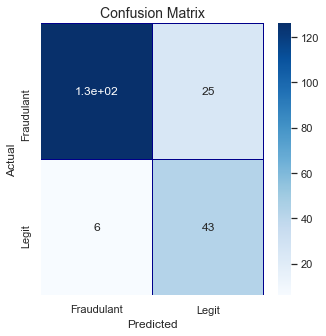

In [122]:
target = 'fraud_reported'
CMTD = pd.crosstab(test_target,DT_Pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(CMTD, 
            xticklabels=['Fraudulant', 'Legit'],
            yticklabels=['Fraudulant', 'Legit'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [123]:
# Accuracy Score
ADT= accuracy_score(test_target, DT_Pred)

print(" Decision Tree Prediction Accuracy : {:.2f}%".format(ADT * 100))
# print()


 Decision Tree Prediction Accuracy : 84.50%


### 3. Building Model ( Naive Bayes )

<br id="sequence-preprocessing">

The Naive Bayes algorithm is a very simple algorithm for **classification**. We won't go into the theory behind it here, but the basic intuition is that it generates **probability distributions** for different classes based on your training data and categorizes new observations based on those distributions.
* There are no hyperparameters to tune.
* One of the assumptions for *Gaussian Naive Bayes* is that your features are **normally distributed**.
* Therefore, applying the **Box-Cox transformation before Naive Bayes** tends to improve performance.
* There's a great read [here](http://stackoverflow.com/questions/10059594/a-simple-explanation-of-naive-bayes-classification) that further breaks down the intuition behind Naive Bayes.

Let's import the tools we'll need:

In [125]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

training_features = sc.fit_transform(training_features)

test_features = sc.transform(test_features)
training_features

# Min-Max scaler (slightly different than StandardScaler!)
#from sklearn.preprocessing import MinMaxScaler

array([[ 1.60356745,  5.6862407 , -0.20742414, ...,  1.4832397 ,
        -0.59852677, -0.24413654],
       [-0.62360956, -0.17586311, -0.20742414, ...,  1.4832397 ,
        -0.59852677,  4.09606858],
       [-0.62360956, -0.17586311, -0.20742414, ..., -0.67419986,
        -0.59852677, -0.24413654],
       ...,
       [-0.62360956, -0.17586311, -0.20742414, ..., -0.67419986,
         1.67076904, -0.24413654],
       [-0.62360956, -0.17586311, -0.20742414, ..., -0.67419986,
        -0.59852677, -0.24413654],
       [ 1.60356745, -0.17586311, -0.20742414, ..., -0.67419986,
        -0.59852677, -0.24413654]])

In [126]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB

NBModel = GaussianNB()

NBModel.fit(training_features, training_target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [127]:
%%time

# Predicting the Test set results
NB_pred = NBModel.predict(test_features)

Wall time: 1.02 ms


### 6.1. NB Accuracy - Confusion Matrix

In [128]:
# Making the Confusion Matrix
CMNB= confusion_matrix(test_target, NB_pred)
CMNB

array([[137,  14],
       [ 23,  26]], dtype=int64)

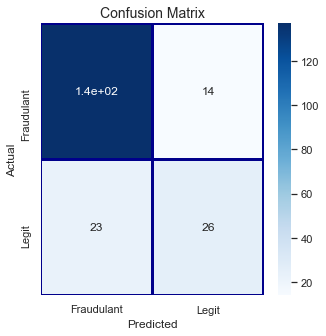

In [135]:
target = 'fraud_reported'
CMTD = pd.crosstab(test_target,NB_pred, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,3))
sns.heatmap(CMTD, 
            xticklabels=['Fraudulant', 'Legit'],
            yticklabels=['Fraudulant', 'Legit'],
            annot=True,ax=ax1,
            linewidths=2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

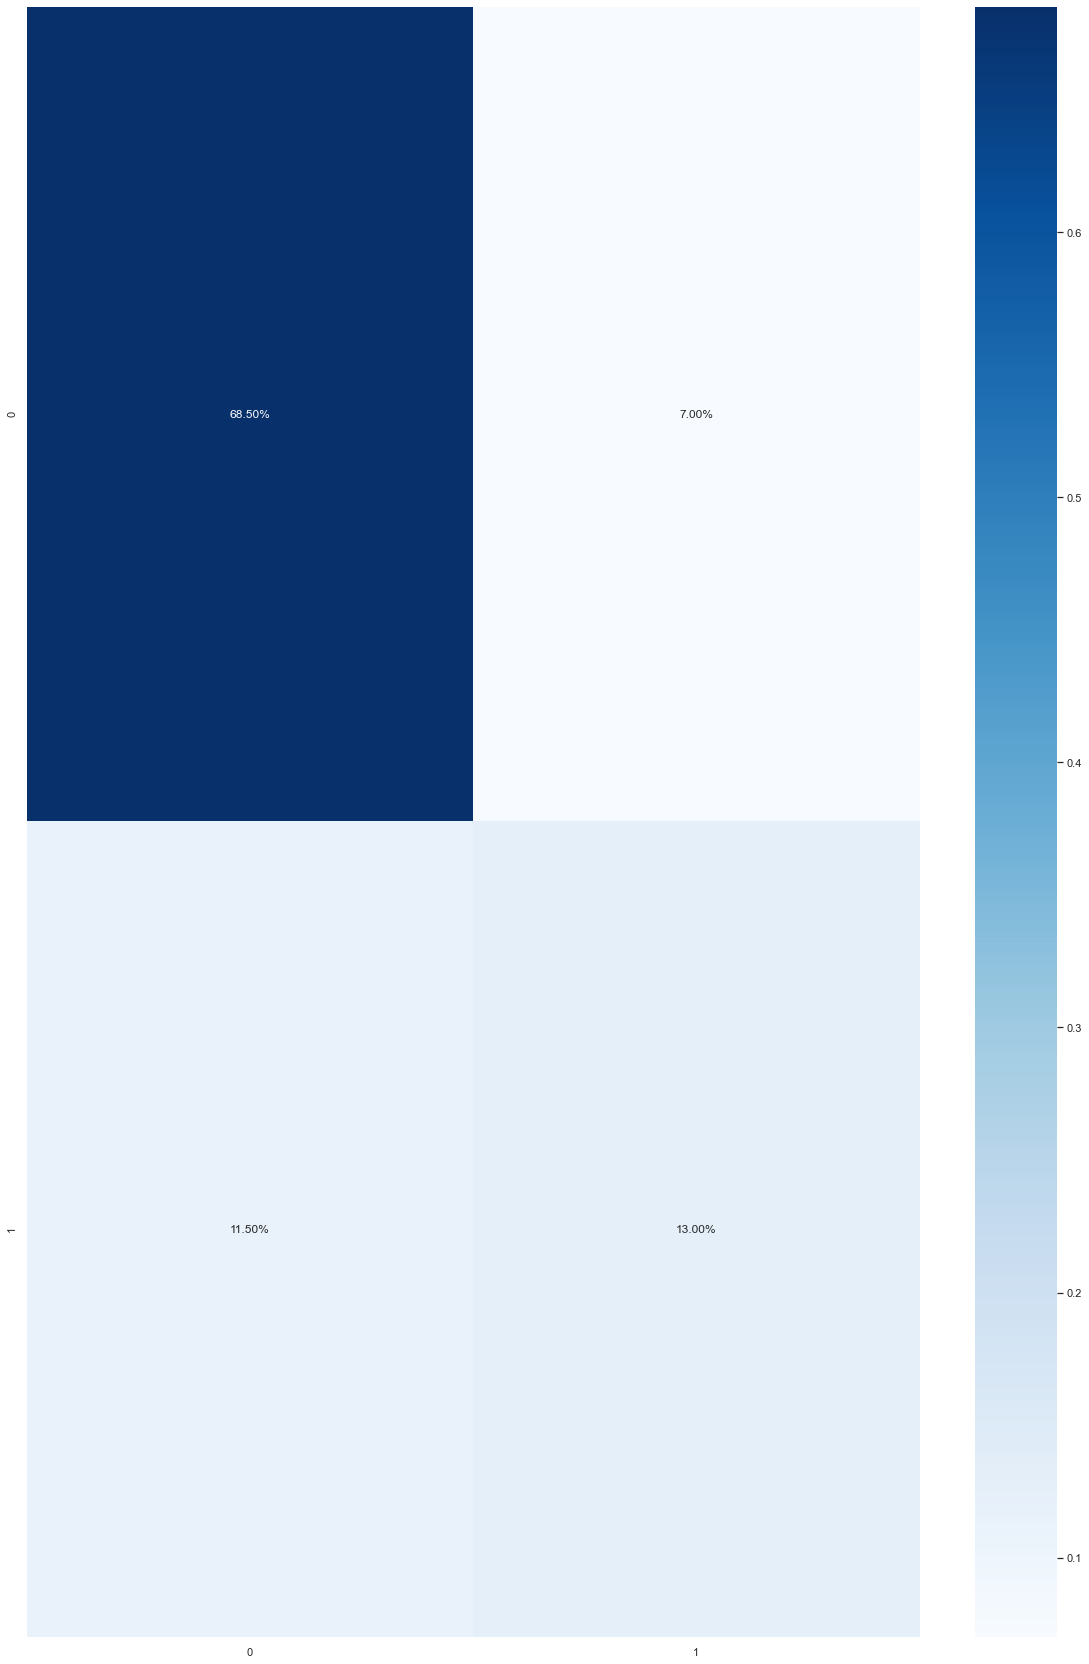

In [138]:
sns.heatmap(CMNB/np.sum(CMNB), annot=True, 
            fmt='.2%', cmap='Blues')

In [129]:
# Accuracy Score
ACNB= accuracy_score(test_target, NB_pred)

print(" NB Prediction Accuracy : {:.2f}%".format(ACNB * 100))
# print()

 NB Prediction Accuracy : 81.50%


### 7. Models Compared

In [130]:
# Accuracy Score
print(' Random Prediction on frequency    : {:5.3f}'.format(score* 100))
print(" Decision Tree Prediction Accuracy : {:.2f}%".format(ADT * 100))
print(" Naive Byes Prediction Accuracy    : {:.2f}%".format(ACNB * 100))

 Random Prediction on frequency    : 75.500
 Decision Tree Prediction Accuracy : 84.50%
 Naive Byes Prediction Accuracy    : 81.50%
